In [202]:
from IPython.display import SVG
from os.path import splitext
import shlex
from subprocess import check_call
from yattag import Doc

import math
from math import pi

def cos(deg): return math.cos(deg*pi/180)
def sin(deg): return math.sin(deg*pi/180)

def logo(
    size=600,
    buf=.05,
    font_size=.21,
    font_color='#ff8c00',
    deg_per_chr=12,
    cx=.5, cy=.92,
    R=.8,
    bg_opacity=0.8,
    dots=False,
    rot_offset=-10,
    save=None,
):
    buf *= size
    font_size *= size
    cx *= size
    cy *= size
    R *= size

    doc, tag, text = Doc().tagtext()

    def txt(
        msg,
        cx, cy,
        deg, rx, ry,
        *args,
        font_size=font_size,
        font_color=font_color,
        **kwargs
    ):
        with tag(
            'text',
            ('font-size',font_size),
            ('font-weight','bold'),
            ('font-family','sans-serif'),
            ('fill',font_color),
            ('alignment-baseline','middle'),
            ('text-anchor','middle'),
            *args,
            transform=f'rotate({deg},{rx},{ry})',
            x=cx,
            y=cy,
            **kwargs,
        ):
            text(msg)
        
    
    with tag('svg', xmlns="http://www.w3.org/2000/svg", width=size+2*buf, height=size+2*buf):
        with tag('g', transform=f'translate({buf},{buf})',):
            with tag('image', href='./recycle.png', width=size, height=size, opacity=bg_opacity): pass

            msg = 'NEWORK'
            start_deg = 90 + deg_per_chr * (len(msg)-1)//2
            for idx, char in enumerate(msg):
                deg = start_deg - idx * deg_per_chr
                x = cx + R * cos(deg)
                y = cy - R * sin(deg)
                txt(char, x, y, 90-deg, x, y)
                if dots:
                    with tag(
                        'circle',
                        fill='black',
                        r=5,
                        cx=x,cy=y,
                    ): pass

            msg = 'AVE'
            start_deg = 270 - deg_per_chr * (len(msg)-1)//2
            cy = size - cy
            for idx, char in enumerate(msg):
                deg = start_deg + idx * deg_per_chr
                x = cx + R * cos(deg)
                y = cy - R * sin(deg)
                txt(char, x, y, 270-deg, x, y)
                if dots:
                    with tag(
                        'circle',
                        fill='black',
                        r=5,
                        cx=x,cy=y,
                    ): pass

    data = doc.getvalue()
    if save:
        from cairosvg import svg2png
        name, ext = splitext(save)
        svg_path = f'{name}.svg'
        png_path = f'{name}.png'
        with open(svg_path,'w') as f:
            f.write(data + '\n')
        cmd = ['convert-svg-to-png',svg_path]
        print('Running: %s' % shlex.join(cmd))
        check_call(cmd)

    return SVG(data)

Running: convert-svg-to-png logo.svg


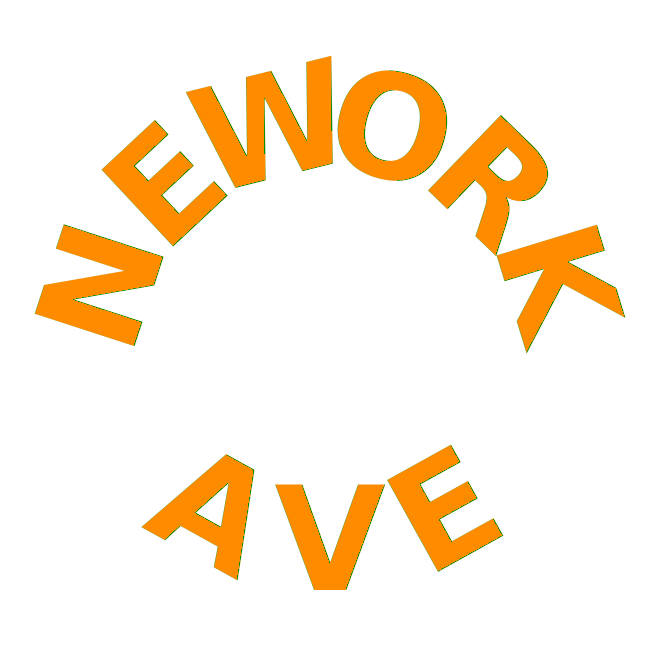

In [203]:
logo(
    font_size=.24,
    deg_per_chr=29,
    cy=.55,
    R=.40,
    bg_opacity=0.6,
    save='logo.png',
)

Running: convert-svg-to-png flat.svg


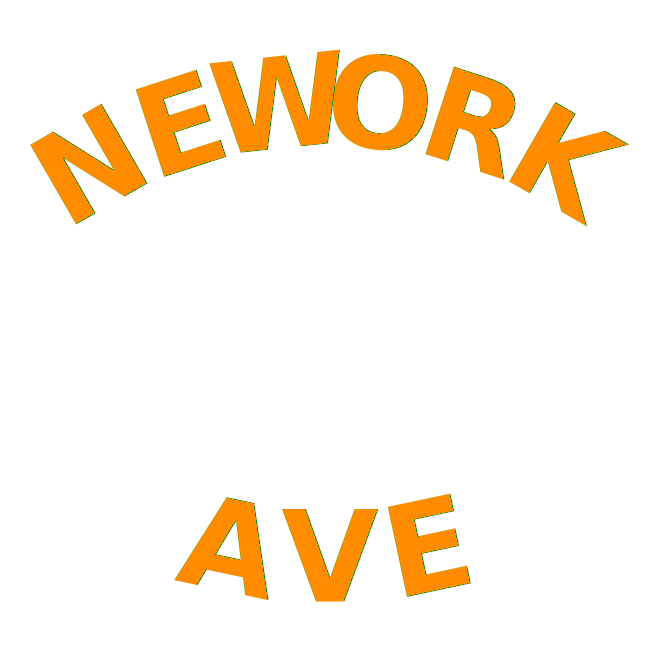

In [204]:
logo(save='flat', bg_opacity=0.8)